Import

In [ ]:
import numpy as np  # ใช้สำหรับการคำนวณทางคณิตศาสตร์และการจัดการข้อมูลตัวเลข
import matplotlib.pyplot as plt  # ใช้สำหรับการพล็อตกราฟ
import pandas as pd  # ใช้สำหรับการจัดการข้อมูลแบบตาราง

from sklearn.preprocessing import MinMaxScaler  # ใช้สำหรับการทำสเกลข้อมูล
from keras.preprocessing.sequence import TimeseriesGenerator  # ใช้สำหรับสร้างชุดข้อมูลสำหรับการฝึกโมเดล Neural Network
from sklearn import metrics  # ใช้สำหรับการคำนวณและประเมินผลลัพธ์


# นำเข้าข้อมูลชุด Train เพื่อฝึกโมเดล ทั้ง 3

In [ ]:
import os
import pandas as pd

Train_nos = [1, 2, 3, 4]
engine_id=50

# สร้างรายการว่างเพื่อเก็บ DataFrame ที่มาจากไฟล์ CSV
dfs = []

# วนลูปผ่านทุก Train_no เพื่ออ่านและรวมข้อมูล
for Train_no in Train_nos:
    # หาที่อยู่ของไฟล์ CSV ที่ต้องการอ่าน
    file_path = "/content/Processed_Train_00{}.csv".format(Train_no)

    # ตรวจสอบว่าไฟล์ CSV นั้นมีอยู่หรือไม่
    if os.path.exists(file_path):
        # โหลดข้อมูลจากไฟล์ CSV
        df = pd.read_csv(file_path)
        df = df[df['ID']==engine_id]
        # ลบคอลัมน์ 'ID' ออกเนื่องจากไม่จำเป็นต้องใช้แล้ว
        df = df.drop(columns=['ID'])

        # เพิ่ม DataFrame เข้าไปในรายการ
        dfs.append(df)
    else:
        print("File not found:", file_path)

# รวมข้อมูลจาก DataFrame ทั้งหมดในรายการเข้าเป็น DataFrame เดียว
combined_df = pd.concat(dfs, ignore_index=True)

# แสดงผลลัพธ์
print(combined_df)


     Cycle  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure7  \
0        1          642.12         1582.50         1400.44          553.76   
1        2          642.62         1589.90         1404.14          554.52   
2        3          642.55         1582.75         1403.42          554.26   
3        4          642.61         1586.91         1403.46          554.56   
4        5          642.41         1589.70         1401.43          554.26   
..     ...             ...             ...             ...             ...   
415    218          537.63         1271.83         1062.26          174.76   
416    219          557.15         1376.43         1146.92          193.91   
417    220          608.45         1500.97         1269.84          332.58   
418    221          550.09         1365.39         1144.24          138.29   
419    222          550.79         1362.95         1151.31          137.53   

     SensorMeasure8  SensorMeasure11  SensorMeasure12  SensorMe

# ปรับข้อมูลให้อยู่ในช่วง 0-1 โดยใช้ MinMaxScaler จาก scikit-learn:

In [ ]:
################################## Scalling the DATA
scaler=MinMaxScaler()
df = scaler.fit_transform(combined_df)
# แสดงขนาดของข้อมูลหลังจากปรับสเกล
print('Shape of df:', df.shape)
df

Shape of df: (753, 14)


array([[0.        , 0.98211638, 0.92462087, ..., 0.97272417, 0.98161851,
        0.89140271],
       [0.00452489, 0.98674944, 0.94524978, ..., 0.97101943, 0.98531538,
        0.88687783],
       [0.00904977, 0.98610082, 0.9253178 , ..., 0.97306512, 0.97752167,
        0.88235294],
       ...,
       [0.76470588, 0.6670682 , 0.67607047, ..., 0.49505626, 0.5080994 ,
        0.00904977],
       [0.76923077, 0.66465901, 0.67679527, ..., 0.49846573, 0.50034569,
        0.00452489],
       [0.77375566, 0.12638992, 0.32632694, ..., 0.01363791, 0.01475319,
        0.        ]])

In [ ]:
features = df[:,0:-1]
target = df[:,-1]  # เลือกคอลัมน์ที่มีชื่อ 'RUL' จาก DataFrame ที่ปรับสเกลแล้ว

target

array([0.89140271, 0.88687783, 0.88235294, 0.87782805, 0.87330317,
       0.86877828, 0.86425339, 0.85972851, 0.85520362, 0.85067873,
       0.84615385, 0.84162896, 0.83710407, 0.83257919, 0.8280543 ,
       0.82352941, 0.81900452, 0.81447964, 0.80995475, 0.80542986,
       0.80090498, 0.79638009, 0.7918552 , 0.78733032, 0.78280543,
       0.77828054, 0.77375566, 0.76923077, 0.76470588, 0.760181  ,
       0.75565611, 0.75113122, 0.74660633, 0.74208145, 0.73755656,
       0.73303167, 0.72850679, 0.7239819 , 0.71945701, 0.71493213,
       0.71040724, 0.70588235, 0.70135747, 0.69683258, 0.69230769,
       0.68778281, 0.68325792, 0.67873303, 0.67420814, 0.66968326,
       0.66515837, 0.66063348, 0.6561086 , 0.65158371, 0.64705882,
       0.64253394, 0.63800905, 0.63348416, 0.62895928, 0.62443439,
       0.6199095 , 0.61538462, 0.61085973, 0.60633484, 0.60180995,
       0.59728507, 0.59276018, 0.58823529, 0.58371041, 0.57918552,
       0.57466063, 0.57013575, 0.56561086, 0.56108597, 0.55656

In [ ]:
win_length = 25   ######### Sliding Window Length
# length: คือความยาวของหน้าต่าง (sliding window) ที่จะนำข้อมูลมาใช้ในการฝึกโมเดล ในที่นี้กำหนดเป็น 25 ค่า (win_length).

feature_num = 13  ######### Total number of features
# features: คือข้อมูลซึ่งเป็นชุดข้อมูลเวลาจริง (time series data) ที่มีจำนวนคุณลักษณะ (features) ทั้งหมด 13 คุณลักษณะ (feature_num).


ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)
# sampling_rate: อัตราการเก็บข้อมูล (sampling rate) ซึ่งในที่นี้เป็น 1 หมายถึงการเก็บข้อมูลทุกๆ 1 หน่วยเวลา.
# batch_size: จำนวนข้อมูลที่จะใช้ในแต่ละชุดในการฝึกโมเดล ซึ่งในที่นี้กำหนดให้มีขนาดเป็น 1 (batch_size=1) ซึ่งหมายความว่าจะใช้ข้อมูลแต่ละชุดเป็นข้อมูลเพียงตัวเดียวเท่านั้นในแต่ละการฝึกโมเดล.

คำสั่ง ts_generator[0] ใช้เพื่อดึงชุดข้อมูลฝึกโมเดล (training data) และเป้าหมาย (target) จาก TimeseriesGenerator ในลำดับที่ 0 หลังจากการสร้าง TimeseriesGenerator ด้วยข้อมูล features และ target ที่ระบุไว้ก่อนหน้านี้ ซึ่งจะได้ผลลัพธ์เป็นข้อมูลฝึกโมเดลและเป้าหมายในรูปแบบของ NumPy array เพื่อนำไปใช้ในการฝึกโมเดล

In [ ]:
ts_generator[0]

(array([[[0.        , 0.98211638, 0.92462087, 0.90513795, 0.96872018,
          0.99913371, 0.9161777 , 0.96917681, 0.99717459, 0.06581419,
          0.95744681, 0.97272417, 0.98161851],
         [0.00452489, 0.98674944, 0.94524978, 0.91421214, 0.97048898,
          0.99907032, 0.9161777 , 0.96991776, 0.99700839, 0.06021529,
          0.95744681, 0.97101943, 0.98531538],
         [0.00904977, 0.98610082, 0.9253178 , 0.91244635, 0.96988386,
          0.99911258, 0.92455993, 0.97023883, 0.99706379, 0.05010114,
          0.93617021, 0.97306512, 0.97752167],
         [0.01357466, 0.98665678, 0.93691459, 0.91254445, 0.97058207,
          0.99913371, 0.92875105, 0.96986836, 0.99717459, 0.06292443,
          0.94680851, 0.97101943, 0.98126996],
         [0.01809955, 0.98480356, 0.94469224, 0.90756591, 0.96988386,
          0.99913371, 0.91785415, 0.96949789, 0.99695299, 0.06324953,
          0.95744681, 0.97340607, 0.97815019],
         [0.02262443, 0.98526686, 0.93253791, 0.91001839, 0.96841

In [ ]:
print('Shape of the input features',np.shape(ts_generator[0][0]))
print((ts_generator[0][0]))
print('\n')
print('Shape of the output variable',np.shape(ts_generator[0][1]))
print(ts_generator[0][1])

Shape of the input features (1, 25, 13)
[[[0.         0.98211638 0.92462087 0.90513795 0.96872018 0.99913371
   0.9161777  0.96917681 0.99717459 0.06581419 0.95744681 0.97272417
   0.98161851]
  [0.00452489 0.98674944 0.94524978 0.91421214 0.97048898 0.99907032
   0.9161777  0.96991776 0.99700839 0.06021529 0.95744681 0.97101943
   0.98531538]
  [0.00904977 0.98610082 0.9253178  0.91244635 0.96988386 0.99911258
   0.92455993 0.97023883 0.99706379 0.05010114 0.93617021 0.97306512
   0.97752167]
  [0.01357466 0.98665678 0.93691459 0.91254445 0.97058207 0.99913371
   0.92875105 0.96986836 0.99717459 0.06292443 0.94680851 0.97101943
   0.98126996]
  [0.01809955 0.98480356 0.94469224 0.90756591 0.96988386 0.99913371
   0.91785415 0.96949789 0.99695299 0.06324953 0.95744681 0.97340607
   0.97815019]
  [0.02262443 0.98526686 0.93253791 0.91001839 0.96841762 0.99904919
   0.93042749 0.96816419 0.99686989 0.05523046 0.92553191 0.96965564
   0.9761332 ]
  [0.02714932 0.98443291 0.93094893 0.9097

In [ ]:
X=[]
y=[]

x_temp, y_temp = ts_generator[0]
X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
y.append(y_temp)

print(X)
print(y)

[array([[[0.        ],
        [0.98211638],
        [0.92462087],
        [0.90513795],
        [0.96872018],
        [0.99913371],
        [0.9161777 ],
        [0.96917681],
        [0.99717459],
        [0.06581419],
        [0.95744681],
        [0.97272417],
        [0.98161851]],

       [[0.00452489],
        [0.98674944],
        [0.94524978],
        [0.91421214],
        [0.97048898],
        [0.99907032],
        [0.9161777 ],
        [0.96991776],
        [0.99700839],
        [0.06021529],
        [0.95744681],
        [0.97101943],
        [0.98531538]],

       [[0.00904977],
        [0.98610082],
        [0.9253178 ],
        [0.91244635],
        [0.96988386],
        [0.99911258],
        [0.92455993],
        [0.97023883],
        [0.99706379],
        [0.05010114],
        [0.93617021],
        [0.97306512],
        [0.97752167]],

       [[0.01357466],
        [0.98665678],
        [0.93691459],
        [0.91254445],
        [0.97058207],
        [0.99913371],
   

In [ ]:
def Data_format_conversion(Train_no,engine_id):
# ฟังก์ชั่นนี้ใช้สำหรับดึงข้อมูลจากไฟล์ CSV ของการฝึกโมเดล (Training Data)
    #และกำหนดรูปแบบของข้อมูลให้เหมาะสมสำหรับการฝึกโมเดล โดยมีขั้นตอนดังนี้:

    #1. อ่านข้อมูลจากไฟล์ CSV ของการฝึกโมเดล `Processed_Train_00{}.csv` โดยระบุหมายเลขของ Train_no และ engine_id เพื่อเลือกข้อมูลที่เกี่ยวข้องกับเครื่องยนต์และการฝึกโมเดลที่ต้องการ
    #2. ทำการปรับสเกลข้อมูลโดยใช้ MinMaxScaler เพื่อให้ข้อมูลมีการกระจายและค่าที่เหมาะสมสำหรับการฝึกโมเดล
    #3. ใช้ TimeseriesGenerator เพื่อแปลงข้อมูลให้อยู่ในรูปแบบที่เหมาะสมสำหรับการฝึกโมเดล โดยกำหนดความยาวของหน้าต่าง (sliding window) และอื่น ๆ ตามที่ต้องการ
    #4. ทำการเปลี่ยนรูปแบบของข้อมูลเข้ามาอยู่ในรูปแบบที่เหมาะสมสำหรับการฝึกโมเดล Convolutional Neural Network (CNN) โดยการจัดรูปแบบของข้อมูลให้อยู่ในรูปแบบ `(no of samples, window_length, features)` เพื่อให้เหมาะกับการนำเข้าข้อมูลเข้าสู่โมเดล CNN
    #5. ส่งคืนข้อมูลที่เตรียมพร้อมใช้งานและ MinMaxScaler เพื่อให้สามารถใช้ในการปรับสเกลข้อมูลขณะทดสอบหรือในการใช้งานจริงได้

    import pandas as pd
    import numpy as np
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df = df.drop(columns=['ID'])

    ################################## Scalling the DATA
    scaler=MinMaxScaler()
    df = scaler.fit_transform(df)
    print('Shape of df for engine {}: '.format(engine_id),df.shape)

    # แบ่งข้อมูลเป็น features และ target
    features = df[:,0:-1]
    target = df[:,-1]


    # ใช้ TimeseriesGenerator เพื่อเตรียมข้อมูลให้เหมาะสมสำหรับการฝึกโมเดล
    ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)

    ################################ Changing the shape of input to (no of smaples,window_length,features)
    X=[]
    y=[]
    for i in range(len(ts_generator)):
        x_temp, y_temp = ts_generator[i]
        X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
        y.append(y_temp)

    X=np.array(X)
    y=np.array(y)

    return(X,y,scaler,features)
    # Returns:
    #- X (numpy.ndarray): ข้อมูลฝึกโมเดลในรูปแบบ `(no of samples, window_length, features)`
    #- y (numpy.ndarray): ข้อมูลเป้าหมายของการฝึกโมเดล
    #- scaler (sklearn.preprocessing.MinMaxScaler): MinMaxScaler ที่ใช้ในการปรับสเกลข้อมูล
    #- features (numpy.ndarray): ข้อมูลฝึกโมเดลที่ไม่ได้รับการปรับสเกล


# สร้างโมเดล RandomForestRegressor

GridSearchCV ดึงพารามิเตอร์ที่ดีที่สุด

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score


# กำหนดค่า win_length และ feature_num
win_length = 25
feature_num = 13

# โหลดข้อมูลและทำการปรับสเกล
combined_df = pd.concat(dfs, ignore_index=True)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(combined_df)
features = df_scaled[:, :-1]
target = df_scaled[:, -1]

# แบ่งข้อมูลเป็นชุดฝึกและทดสอบ
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# กำหนดตารางพารามิเตอร์
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# กำหนดโมเดล RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# สร้าง GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# ทำการ GridSearchCV
grid_search.fit(X_train, y_train)

# ดึงพารามิเตอร์ที่ดีที่สุด
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# ดึงโมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

# ฝึกโมเดลที่ดีที่สุด
best_rf_model.fit(X_train, y_train)

# ทำนายบนชุดทดสอบโดยใช้โมเดลที่ดีที่สุด
predictions_best_rf = best_rf_model.predict(X_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# คำนวณค่า MSE, RMSE, R^2

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the best model
mse_best_rf = mean_squared_error(y_test, predictions_best_rf)
print("MSE on Testing Set using the best model:", np.sqrt(mse_best_rf))

# คำนวณ RMSE
rmse_best_rf = np.sqrt(mean_squared_error(y_test, predictions_best_rf))
print("RMSE on Testing Set using the best model:", rmse_best_rf)

# คำนวณ R-squared
r2_best_rf = r2_score(y_test, predictions_best_rf)
print("R-squared on Testing Set using the best model:", r2_best_rf)


MSE on Testing Set using the best model: 0.07349952816140559
RMSE on Testing Set using the best model: 0.07349952816140559
R-squared on Testing Set using the best model: 0.9196635407324009


# สร้าง SVM

GridSearchCV ดึงพารามิเตอร์ที่ดีที่สุด

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# สร้างตัวแปร SVM regressor
svm_regressor = SVR()

# กำหนดเซ็ตของพารามิเตอร์ที่เป็นไปได้ของ SVM
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# สร้าง GridSearchCV
grid_search = GridSearchCV(svm_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit ข้อมูล
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# พิมพ์ผลลัพธ์ GridSearchCV
print("Best parameters found:", grid_search.best_params_)
print("Best MSE found:", -grid_search.best_score_)


Best parameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best MSE found: 0.008466884063576185


In [ ]:
# ทำนายกับข้อมูลทดสอบ
predictions_svm = grid_search.predict(X_test)

# คำนวณค่า RMSE
rmse_svm = np.sqrt(mean_squared_error(y_test, predictions_svm))
print("RMSE on Testing Set using SVM:", rmse_svm)

# คำนวณค่า R-squared
r2_svm = r2_score(y_test, predictions_svm)
print("R-squared on Testing Set using SVM:", r2_svm)

RMSE on Testing Set using SVM: 0.09143530332591407
R-squared on Testing Set using SVM: 0.8756712965904576


# สร้างโมเดล Linear Regression เพื่อทำนายบนชุดข้อมูลทดสอบ

GridSearchCV ดึงพารามิเตอร์ที่ดีที่สุด

In [ ]:
from sklearn.linear_model import LinearRegression

# สร้างตัวแปร Linear Regression
linear_regressor = LinearRegression()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# สร้างตัวแปร Linear Regression
linear_regressor = LinearRegression()

# กำหนดเซ็ตของพารามิเตอร์ที่เป็นไปได้ของ Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False]
}

# สร้าง GridSearchCV
grid_search_lr = GridSearchCV(linear_regressor, param_grid_lr, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit ข้อมูล
grid_search_lr.fit(X_train, y_train)

# พิมพ์ผลลัพธ์ GridSearchCV
print("Best parameters found:", grid_search_lr.best_params_)
print("Best MSE found:", -grid_search_lr.best_score_)




Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found: {'fit_intercept': True}
Best MSE found: 0.009528605386656522


In [ ]:
# ทำนายกับข้อมูลทดสอบ
predictions_lr = grid_search_lr.predict(X_test)

In [ ]:
# คำนวณค่า RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, predictions_lr))
print("RMSE on Testing Set using Linear Regression:", rmse_lr)

# คำนวณค่า R-squared
r2_lr = r2_score(y_test, predictions_lr)
print("R-squared on Testing Set using Linear Regression:", r2_lr)

RMSE on Testing Set using Linear Regression: 0.09229084932412307
R-squared on Testing Set using Linear Regression: 0.8733337626277633


# บันทึกเฉพาะโมเดลที่ดีที่สุดเท่านั้น คือ random_forest

In [ ]:
import joblib

# ชื่อของไฟล์ที่จะบันทึกโมเดล
filename_rf = 'best_random_forest_regression_model.pkl'

# บันทึกโมเดล Random Forest Regression ลงในไฟล์
joblib.dump(best_rf_model, filename_rf)


['best_random_forest_regression_model.pkl']

In [ ]:
import joblib

# ชื่อของไฟล์ที่บันทึกโมเดล
filename_rf = 'best_random_forest_regression_model.pkl'

# โหลดโมเดลจากไฟล์
loaded_rf_model = joblib.load(filename_rf)

# ใช้โมเดลทำนาย
predictions = loaded_rf_model.predict(X_test)

In [ ]:
len(features)

753

In [ ]:
# Predict on the testing set
predictions_rf = rf_model.predict(X_test)
np.shape(predictions_rf)

(151,)

In [ ]:
rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(predictions_rf)],axis=1)
rev_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.113122,0.987861,0.915756,0.898394,0.969651,0.999155,0.926236,0.969202,0.997064,0.056964,0.946809,0.967610,0.979899,0.198100
1,0.117647,0.985267,0.936190,0.910999,0.969232,0.999113,0.920369,0.968436,0.997147,0.067151,0.936170,0.972042,0.977270,0.523710
2,0.122172,0.983599,0.935772,0.921300,0.967975,0.999303,0.928751,0.968238,0.996925,0.055881,0.936170,0.971019,0.978773,0.207692
3,0.126697,0.989529,0.948511,0.902097,0.969186,0.999155,0.918692,0.968189,0.996870,0.056170,0.925532,0.971019,0.979184,0.507919
4,0.131222,0.986749,0.946783,0.922943,0.969698,0.999091,0.911148,0.970017,0.997175,0.057362,0.946809,0.973747,0.968294,0.799457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0.755656,0.183747,0.350440,0.264451,0.146741,0.651876,0.514669,0.146855,0.999280,0.295333,0.351064,0.166723,0.160771,NaN
724,0.760181,0.665678,0.684015,0.574004,0.478926,0.865386,0.701593,0.479414,0.999529,0.270590,0.691489,0.491306,0.504842,NaN
725,0.764706,0.667068,0.676070,0.593231,0.482487,0.865767,0.716681,0.481958,1.000000,0.262498,0.680851,0.495056,0.508099,NaN
726,0.769231,0.664659,0.676795,0.572753,0.482882,0.865830,0.730930,0.483539,0.999945,0.258236,0.680851,0.498466,0.500346,NaN


In [ ]:
rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
rev_trans =pd.DataFrame(rev_trans)
rev_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,26.0,642.74,1579.32,1397.69,554.16,2388.06,47.43,521.98,2388.04,8.4121,393.0,38.81,23.3646,43.78
1,27.0,642.46,1586.65,1402.83,553.98,2388.04,47.36,521.67,2388.07,8.4403,392.0,38.94,23.3186,115.74
2,28.0,642.28,1586.50,1407.03,553.44,2388.13,47.46,521.59,2387.99,8.4091,392.0,38.91,23.3449,45.90
3,29.0,642.92,1591.07,1399.20,553.96,2388.06,47.34,521.57,2387.97,8.4099,391.0,38.91,23.3521,112.25
4,30.0,642.62,1590.45,1407.70,554.18,2388.03,47.25,522.31,2388.08,8.4132,393.0,38.99,23.1615,176.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,168.0,555.96,1376.53,1139.20,200.58,2223.70,42.52,189.02,2388.84,9.0720,337.0,15.32,9.0288,NaN
724,169.0,607.97,1496.19,1265.42,343.31,2324.75,44.75,323.67,2388.93,9.0035,369.0,24.84,15.0505,NaN
725,170.0,608.12,1493.34,1273.26,344.84,2324.93,44.93,324.70,2389.10,8.9811,368.0,24.95,15.1075,NaN
726,171.0,607.86,1493.60,1264.91,345.01,2324.96,45.10,325.34,2389.08,8.9693,368.0,25.05,14.9718,NaN


In [ ]:
df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
df = df[df['ID']==engine_id]
df_actual = df.drop(columns=['ID'])
df_actual

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
12485,1,606.98,1482.04,1241.33,335.35,2323.85,44.02,315.61,2387.99,9.1990,365,24.66,14.7896,171
12486,2,554.23,1359.70,1124.42,195.25,2222.89,41.64,183.42,2388.01,9.2543,332,14.96,9.0234,170
12487,3,554.98,1365.18,1122.45,194.65,2222.91,41.50,183.49,2388.03,9.2806,332,14.87,8.9161,169
12488,4,549.52,1339.92,1121.17,139.21,2211.93,41.78,130.61,2388.05,9.3539,330,10.75,6.4001,168
12489,5,604.72,1499.56,1296.40,395.18,2318.80,45.20,372.10,2388.11,8.6171,367,28.60,17.1786,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12652,168,555.96,1376.53,1139.20,200.58,2223.70,42.52,189.02,2388.84,9.0720,337,15.32,9.0288,4
12653,169,607.97,1496.19,1265.42,343.31,2324.75,44.75,323.67,2388.93,9.0035,369,24.84,15.0505,3
12654,170,608.12,1493.34,1273.26,344.84,2324.93,44.93,324.70,2389.10,8.9811,368,24.95,15.1075,2
12655,171,607.86,1493.60,1264.91,345.01,2324.96,45.10,325.34,2389.08,8.9693,368,25.05,14.9718,1


# นำเข้าข้อมูลชุด TEST ทั้ง 4 ไฟล์

In [ ]:
import os
import pandas as pd

Train_nos = [1, 2, 3, 4]  # รหัสของรถไฟ

# สร้างรายการว่างเพื่อเก็บ DataFrame ที่มาจากไฟล์ CSV
dfs = []

# วนลูปผ่านทุก Train_no เพื่ออ่านและรวมข้อมูล
for Train_no in Train_nos:
    # หาที่อยู่ของไฟล์ CSV ที่ต้องการอ่าน
    file_path = "Processed_Test_00{}.csv".format(Train_no)

    # ตรวจสอบว่าไฟล์ CSV นั้นมีอยู่หรือไม่
    if os.path.exists(file_path):
        # โหลดข้อมูลจากไฟล์ CSV
        df = pd.read_csv(file_path)

        # ลบคอลัมน์ 'ID' ออกเนื่องจากไม่จำเป็นต้องใช้แล้ว
        df = df.drop(columns=['ID'])

        # เพิ่ม DataFrame เข้าไปในรายการ
        dfs.append(df)
    else:
        print("File not found:", file_path)

# รวมข้อมูลจาก DataFrame ทั้งหมดในรายการเข้าเป็น DataFrame เดียว
combined_df_test = pd.concat(dfs, ignore_index=True)

# แสดงผลลัพธ์
print(combined_df_test)


        Cycle  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure7  \
0           1          643.02         1585.29         1398.21          553.90   
1           2          641.71         1588.45         1395.42          554.85   
2           3          642.46         1586.94         1401.34          554.11   
3           4          642.44         1584.12         1406.42          554.07   
4           5          642.51         1587.19         1401.92          554.16   
...       ...             ...             ...             ...             ...   
104892    277          550.30         1364.40         1129.17          138.34   
104893    278          608.00         1494.75         1260.88          334.75   
104894    279          555.92         1370.65         1130.97          194.92   
104895    280          608.19         1489.11         1256.25          333.15   
104896    281          556.40         1378.58         1140.70          194.26   

        SensorMeasure8  Sen

# แสดงค่าที่ถูกโมเดลทำนายระหว่างค่าจริง

<ipython-input-275-93bbc98c8138>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


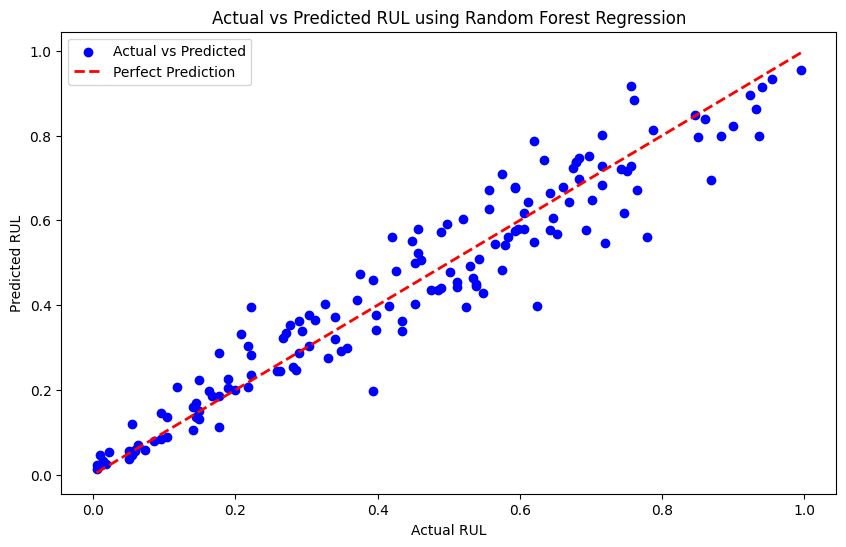

In [ ]:
import matplotlib.pyplot as plt

# แสดงกราฟการเปรียบเทียบระหว่างค่าจริงกับค่าที่โมเดลทำนายออกมา
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_best_rf, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL using Random Forest Regression')
plt.legend()
plt.show()


# เพื่อทำนายข้อมูลสำหรับ 5 แถวแรกของชุดข้อมูล combined_df_test (ข้อมูลชุด Test ที่เรารวมมา 4 ไฟล์)

In [ ]:
# สุ่มข้อมูล 5 แถวแรกจาก DataFrame ที่ชื่อ combined_df_test
sampled_data = combined_df_test.iloc[:5]

# ปรับสเกลข้อมูลที่สุ่มไว้โดยใช้ MinMaxScaler
scaler = MinMaxScaler()
sampled_data_scaled = scaler.fit_transform(sampled_data)

# แยกคุณลักษณะ (features) และ target จากข้อมูลที่มีการปรับสเกลแล้ว
features_sampled = sampled_data_scaled[:, :-1]
target_sampled = sampled_data_scaled[:, -1]

# ทำการทำนายโดยใช้โมเดล Random Forest Regression
predictions_sampled = rf_model.predict(features_sampled)

# ย้อนกลับการปรับสเกลให้กลับมาเป็นสเกลเดิม
rev_trans_sampled = np.concatenate((features_sampled, predictions_sampled.reshape(-1, 1)), axis=1)
rev_trans_sampled = scaler.inverse_transform(rev_trans_sampled)
rev_trans_sampled = pd.DataFrame(rev_trans_sampled)

# แสดงข้อมูลที่สุ่มและการทำนาย
print("Sampled Data:")
print(sampled_data)
print("\nPredictions:")
print(rev_trans_sampled)


Sampled Data:
   Cycle  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure7  \
0      1          643.02         1585.29         1398.21          553.90   
1      2          641.71         1588.45         1395.42          554.85   
2      3          642.46         1586.94         1401.34          554.11   
3      4          642.44         1584.12         1406.42          554.07   
4      5          642.51         1587.19         1401.92          554.16   

   SensorMeasure8  SensorMeasure11  SensorMeasure12  SensorMeasure13  \
0         2388.04            47.20           521.72          2388.03   
1         2388.01            47.50           522.16          2388.06   
2         2388.05            47.50           521.97          2388.03   
3         2388.03            47.28           521.38          2388.05   
4         2388.01            47.31           522.15          2388.03   

   SensorMeasure15  SensorMeasure17  SensorMeasure20  SensorMeasure21  RUL  
0           8.4052 

# พล็อตกราฟดูเพื่อเปรียบเทียบค่าที่ถูกทำนายและค่าที่เป็นความจริงของชุดข้อมูล

True RUL:
0    142
1    141
2    140
3    139
4    138
Name: RUL, dtype: int64

Predicted RUL:
0    141.204344
1    140.303348
2    139.501719
3    138.824796
4    138.148054
Name: 13, dtype: float64


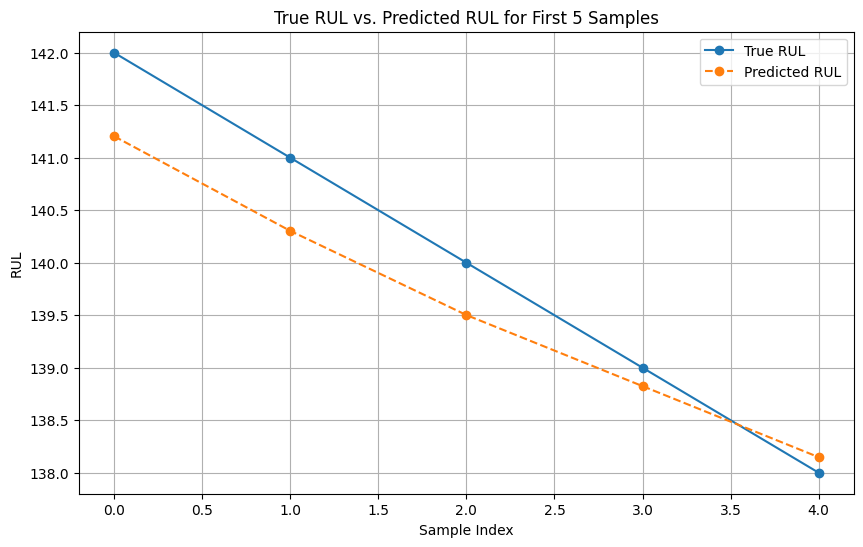

In [ ]:
import matplotlib.pyplot as plt

# ดึงคอลัมน์ RUL จากข้อมูลที่สุ่มมา
true_RUL = sampled_data['RUL'].reset_index(drop=True)

# สร้าง DataFrame เพื่อแสดงค่า RUL ทั้งของจริงและทำนาย
predictions_df = pd.DataFrame({
    'True RUL': true_RUL,
    'Predicted RUL': rev_trans_sampled.iloc[:, -1]
})
# แสดงเฉพาะค่า RUL ของจริงและค่า RUL ที่ทำนายไว้
print("True RUL:")
print(sampled_data['RUL'])
print("\nPredicted RUL:")
print(rev_trans_sampled.iloc[:, -1])

# พล็อตกราฟ True RUL vs. Predicted RUL
plt.figure(figsize=(10, 6))
plt.plot(predictions_df.index, predictions_df['True RUL'], label='True RUL', marker='o', linestyle='-')
plt.plot(predictions_df.index, predictions_df['Predicted RUL'], label='Predicted RUL', marker='o', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.title('True RUL vs. Predicted RUL for First 5 Samples')
plt.legend()
plt.grid(True)
plt.show()
